<a href="https://colab.research.google.com/github/sarmi2325/Machine-Learning/blob/main/BHP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn

In [2]:
df = pd.read_csv('BHP.csv')
df.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274


In [3]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


**Percentile**

In [4]:
lower = df.price_per_sqft.quantile(0.001)
upper = df.price_per_sqft.quantile(0.999)
lower,upper

(1366.184, 50959.36200000098)

In [6]:
outliers = df[(df.price_per_sqft<lower)|(df.price_per_sqft>upper)]
outliers.shape

(28, 7)

In [7]:
df2 = df[(df.price_per_sqft>lower)&(df.price_per_sqft<upper)]
df2.shape

(13172, 7)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

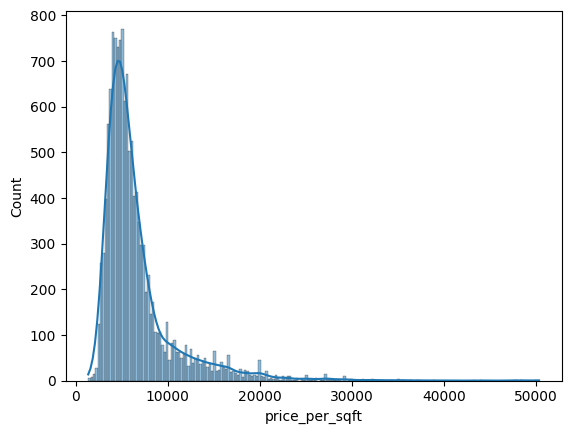

In [17]:
sn.histplot(df2.price_per_sqft,kde=True)

**standard** **deviation**

In [14]:
lower = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
upper = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
lower, upper

(-9900.429065502582, 23227.73653589432)

In [15]:
df2[(df2.price_per_sqft<lower)|(df2.price_per_sqft>upper)].shape

(125, 7)

In [22]:
df3 = df2[(df2.price_per_sqft>lower)&(df2.price_per_sqft<upper)]
df3.shape

(13047, 7)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

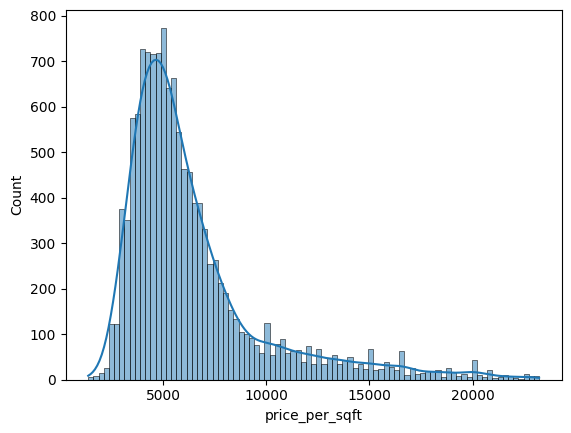

In [23]:
sn.histplot(df3.price_per_sqft,kde=True)

**Z-score**

In [26]:
df2['zscore']=(df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

<ipython-input-26-6d6847cc7bd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore']=(df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
708,7th Phase JP Nagar,2 BHK,1050.0,2.0,71.00,2,6761,0.023508
9081,other,3 BHK,1119.0,2.0,48.50,3,4334,-0.562580
9907,other,8 Bedroom,600.0,4.0,175.00,8,29166,5.434010
12798,Horamavu Agara,3 Bedroom,1400.0,3.0,63.00,3,4500,-0.522493
3547,Jakkur,2 BHK,1230.0,2.0,76.00,2,6178,-0.117279
8318,Indira Nagar,4 Bedroom,2400.0,4.0,405.00,4,16875,2.465901
6249,Electronic City Phase II,3 BHK,1611.0,2.0,48.33,3,3000,-0.884722
10020,Haralur Road,2 BHK,1243.0,2.0,46.00,2,3700,-0.715682
4699,other,2 BHK,1155.0,2.0,56.00,2,4848,-0.438456
9795,Malleshwaram,1 BHK,620.0,1.0,86.80,1,14000,1.771628


In [28]:
outliers = df2[(df2.zscore<-4)|(df2.zscore>4)]
outliers.shape

(125, 8)

In [29]:
no_outliers = df2[(df2.zscore>-4)&(df2.zscore<4)]
no_outliers.shape

(13047, 8)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

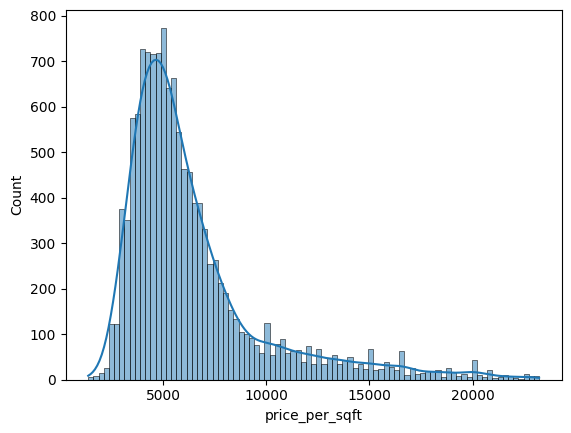

In [30]:
sn.histplot(no_outliers.price_per_sqft,kde=True)